In [31]:
import numpy as np
import matplotlib .pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
from matplotlib_scalebar.scalebar import ScaleBar
import tifffile
from skimage.transform import resize

In [32]:
def crop_images(img, edge_length, stride, target_path, target_size = None):
    M=N= edge_length
    I_inc = J_inc = stride
    
    count = 0
    for i in tqdm(range(0, img.shape[0], I_inc)):
        for j in range(0, img.shape[1], J_inc):

            if len(img.shape) == 3:# check if the image is color image , channels = 3
                subset = img[i:i+N, j:j+N, :]
                if subset.shape == (N, M, 3):
                    tifffile.imsave(target_path + 'crop' +"_"+str(count)+ '.tif', subset)
                    count += 1
    
                
            elif len(img.shape) == 2:
                subset = img[i:i+N, j:j+N]
                if subset.shape == (N, M):
                    resized_subset = subset.astype('uint8')
                    if target_size is not None:
                        resized_subset = (resize(subset, (target_size, target_size), mode= 'constant', preserve_range= True,
                      anti_aliasing= True, anti_aliasing_sigma= False))
                        
                        # sometimes resizing creates artifacts and intermediate values between 0 and 255
                        resized_subset =  np.where(resized_subset > 0, 255, 0).astype('uint8')
                        
                        
                    tifffile.imsave(target_path + 'crop' +"_"+str(count)+ '.tif', resized_subset)
                    count += 1
    print(f'Number of cropped images= {count}')

In [33]:
import os

In [34]:
folder_path = r'C:\Users\tohan\OneDrive\Desktop\opt/'
list_images =os.listdir(r'C:\Users\tohan\OneDrive\Desktop\opt/')

In [35]:
folder_path + list_images[0]

'C:\\Users\\tohan\\OneDrive\\Desktop\\opt/87_Z22_06_Matching_REsegmented_opt_CLAY.tif'

In [40]:
list_images

['87_Z22_06_Matching_REsegmented_opt_CLAY.tif',
 '87_Z22_09_Matching_REsegmented_opt_CLAY.tif',
 '87_Z22_12_Matching_REsegmented_opt_CLAY.tif',
 '87_Z22_15_Matching_REsegmented_opt_CLAY.tif',
 '87_Z22_16_Matching_REsegmented_opt_CLAY.tif',
 '87_Z22_17_Matching_REsegmented_opt_CLAY.tif',
 '87_Z22_18_Matching_REsegmented_opt_CLAY.tif',
 '87_Z22_20_Matching_REsegmented_opt_CLAY.tif']

In [36]:

stack_image = np.zeros((9, 920, 920))
for idx, file in enumerate(list_images):
#     print(idx, img.shape)
    img = tifffile.imread(folder_path + list_images[idx])[0:920, 0:920]
    stack_image[idx] = img
    

In [37]:
stack_image.shape

(9, 920, 920)

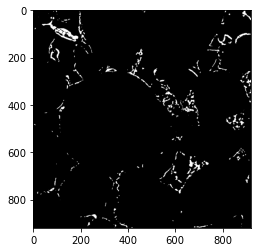

In [39]:
plt.figure()
plt.imshow(stack_image[4], cmap = 'gray')
plt.show()

In [6]:
img = tifffile.imread(r'C:\Users\tohan\OneDrive\Desktop\opt/*.tif')


ValueError: could not broadcast input array from shape (1054,1538) into shape (1028,1956)

In [ ]:
img.shape

In [ ]:
# target_path = r'D:\Hamed\Serpentinite\ROR-09\ROR-09-2_978522106\largeImage\Upper_part\GAN_1024_Resized_128\resized_128\training_images/'
target_path = r'D:\Hamed\Serpentinite\ROR-09\ROR-09-2_978522106\largeImage\Upper_part\GAN_1024_Resized_128\original_1024/'

crop_images(img, edge_length= 920, stride= 920, target_path= target_path, target_size= None)